In [1]:
import cv2
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
import os

In [2]:
input_path = "../data/sheets/6751.tif"
original_img = np.array(io.imread(input_path), dtype=float) / 255
print("original image shape: ", original_img.shape)


original image shape:  (4919, 4409, 4)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


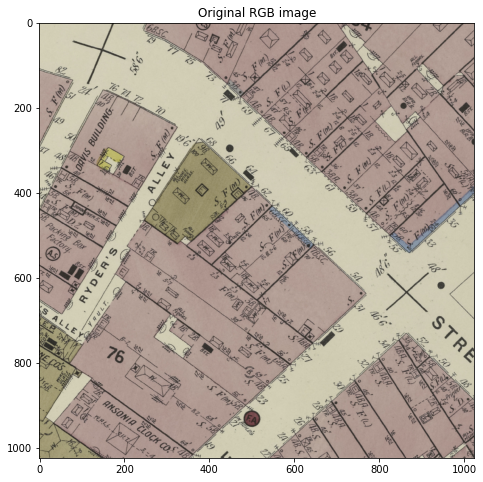

In [3]:
PROTOTYPE = True
if PROTOTYPE:
    a, b, s = 1500, 2000, 1024 # offset, offset, size for cropping
    img_crop = original_img[a:a+s, b:b+s,:3]
    io.imsave("test_hough.jpg",img_crop)
    plt.figure(figsize=(8,8))
    plt.title('Original RGB image')
    plt.imshow(img_crop)
    plt.show()

**Direct Canny** :test 1

In [105]:
def fixColor(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

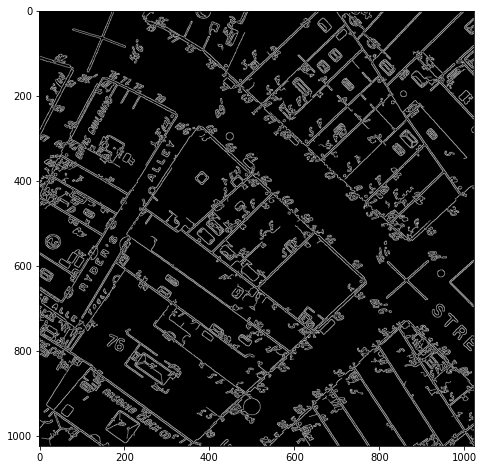

In [130]:
if not os.path.exists('./canny_test'):
    os.mkdir('./canny_test')
gray = rgb2gray(img_crop*255)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# for i in np.arange(10,200,20):
#     for j in np.arange(200,400,10):
#         test1 = cv2.Canny(np.uint8(blurred), threshold1=i, threshold2=j)
#         io.imsave("canny_test/"+str(i)+"_"+str(j)+".png", test1)

canny = cv2.Canny(np.uint8(blurred), threshold1=90, threshold2=300)
plt.figure(figsize=(8,8))
plt.imshow(fixColor(canny))
plt.show()

In [131]:
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [132]:
coins = img_crop.copy()

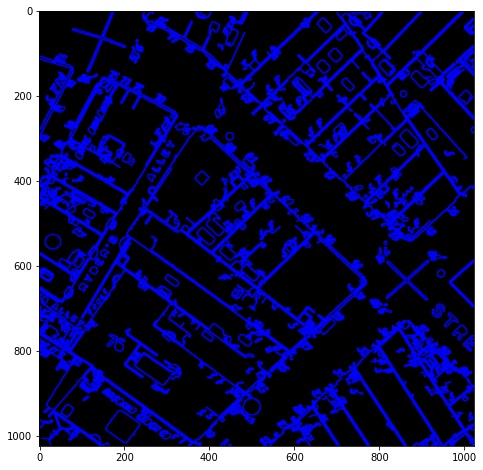

In [133]:
cv2.drawContours(coins, cnts, -1, (255, 0, 0), 2)
plt.figure(figsize=(8,8))
plt.imshow(fixColor(np.uint8(coins)))

**Line Detection with Hough Transforms**

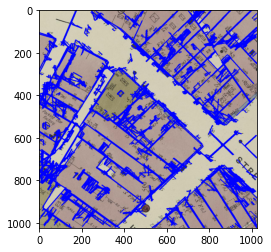

In [153]:
lines = cv2.HoughLinesP(canny, rho=1, theta=np.pi/180, threshold = 90, minLineLength=8, maxLineGap=15)
img = cv2.imread("test_hough.jpg")
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
plt.imshow(fixColor(img))

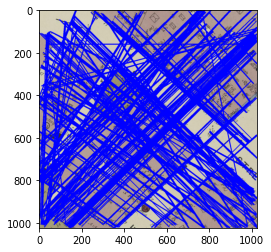